# Assignment 1 - Application of Machine Learning in Computer Vision

Jonathan Chia - jchia3 - 8/29/2023

## 1. Define each of the following machine learning terms in your own words:

**i. the training dataset, testing dataset, and validation dataset**

- training dataset is the dataset we train the model on
- we use the trained model to predict on the testing dataset and then compare our predictions to the actuals in the testing set
- comparing the predictions to the actuals helps us to finetune and improve the trained model
- when we have a trained model we are happy with, we test it on the final validation dataset

**ii. ground truth, label**

- ground truth is the labelled data that we use to train the model, so it learns and then can be used to predict on unlabelled data
- the label is the y variable - in classification it can be a binary 1/0 or multiple character names

**iii. pre-processing, feature, numerical, nominal**

- preprocessing: preparing the data to be modeled - this can include converting features, transforming features, cleaning the data, etc.
- feature: one of the inputs into the model
- numerical variables are features with only numbers
- nominal variables are features with only text

**iv. decision surface**

**v. model validation, accuracy, cross-validation**

**vi. parameters, hyperparameters, overfit**

- parameters:
- hyperparameters:
- overfit: overfitting is the opposite of building a generalized model. The model fits the training data super well but then can't predict well because it's only learned the specific nuances of the training data instead of learning how to generalize

# Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn import datasets, svm, metrics

# 2. Explore Iris Dataset


In [2]:
iris = datasets.load_iris()


**i. the number of data points**

In [3]:
print(f"number of rows: {len(iris.data)}")

number of rows: 150


**ii. the number of features and their types**

In [4]:
print(f"number of features is {len(iris.feature_names)}")
print(iris.feature_names)

number of features is 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**iii. the number and name of categories (i.e. the target field)**

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**iv. the mean (or mode if nominal) of the first two features**


In [6]:
# convert to pandas dataframe for easier visualization
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df['sepal length (cm)'].mean()

5.843333333333334

In [8]:
iris_df['sepal width (cm)'].mean()

3.0573333333333337


# 2b. Next, locate the Wine dataset, load and explore it answering above questions once more.


In [9]:
wine = datasets.load_wine()


**i. the number of data points**


In [10]:
len(wine.data) # this is number of rows

178


**ii. the number of features and their types**


In [11]:
print(f"number of features is {len(wine.feature_names)}")
print(wine.feature_names)

number of features is 13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']



**iii. the number and name of categories (i.e. the target field)**


In [12]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')


**iv. the mean (or mode if nominal) of the first two features**

In [13]:
# convert to pandas dataframe for easier visualization
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
wine_df.alcohol.mean()

13.00061797752809

In [15]:
wine_df.malic_acid.mean()

2.3363483146067416

# 3. [20 pts] Use the following code piece to display Iris dataset feature pairs:

**From the plots, which feature(s) shows the most promising separation power for machine
learning?**

The feature pairs that show most promise are the petal width + petal lengths and sepal length + petal length. 

Why? 

You can see in the petal width + petal length plot that each of the species are clustered nicely with setosa on the left, versicolor in the middle, and virginia on the upper right.

Same goes for the sepal length + petal length plot. I would argue that sepal length + petal width is pretty good too. 

It looks like classifying setosa will be easy, but sometimes it will be difficult to classify versicolor and virgina. 

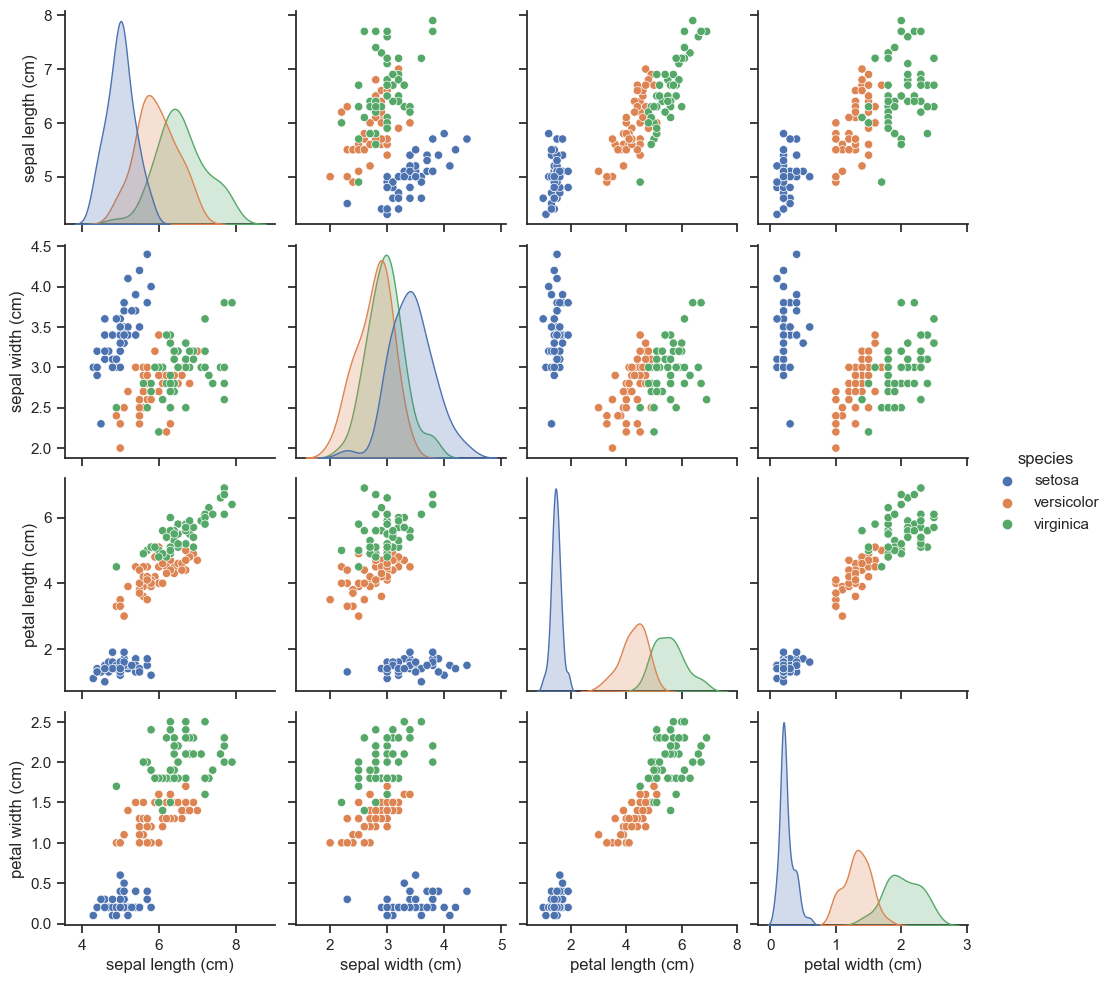

In [16]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(
data= np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
columns= iris.feature_names + ['species'])
cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')

**Now plot the features of the Wine dataset in question 2.**

Based on the histograms, I chose to examine alcohol, color intensity, prolines, and the diluted wine feature.

These 4 features all pair well with each other

In [17]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(
data= np.c_[wine.data, [wine.target_names[v] for v in wine.target]],
columns= wine.feature_names + ['alcohol_class'])
cols = wine_df.columns.drop('alcohol_class')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)

In [18]:
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


In [19]:
def examine_all_features(feature):
    wine_features = wine.feature_names.copy()
    wine_features.remove(feature)
    g1 = sns.pairplot(wine_df[[feature] + wine_features[0:4] + ['alcohol_class']], hue='alcohol_class', corner=True)
    g2 = sns.pairplot(wine_df[[feature] + wine_features[4:8] + ['alcohol_class']], hue='alcohol_class', corner=True)
    g3 = sns.pairplot(wine_df[[feature] + wine_features[8:12] + ['alcohol_class']], hue='alcohol_class', corner=True)
    return g1, g2, g3

def examine_feature_pair(feature, other_feature):
    g = sns.pairplot(wine_df[[feature] + [other_feature] + ['alcohol_class']], hue='alcohol_class', corner=True)
    return g

(<seaborn.axisgrid.PairGrid at 0x16860037d50>,
 <seaborn.axisgrid.PairGrid at 0x16866ed8650>)

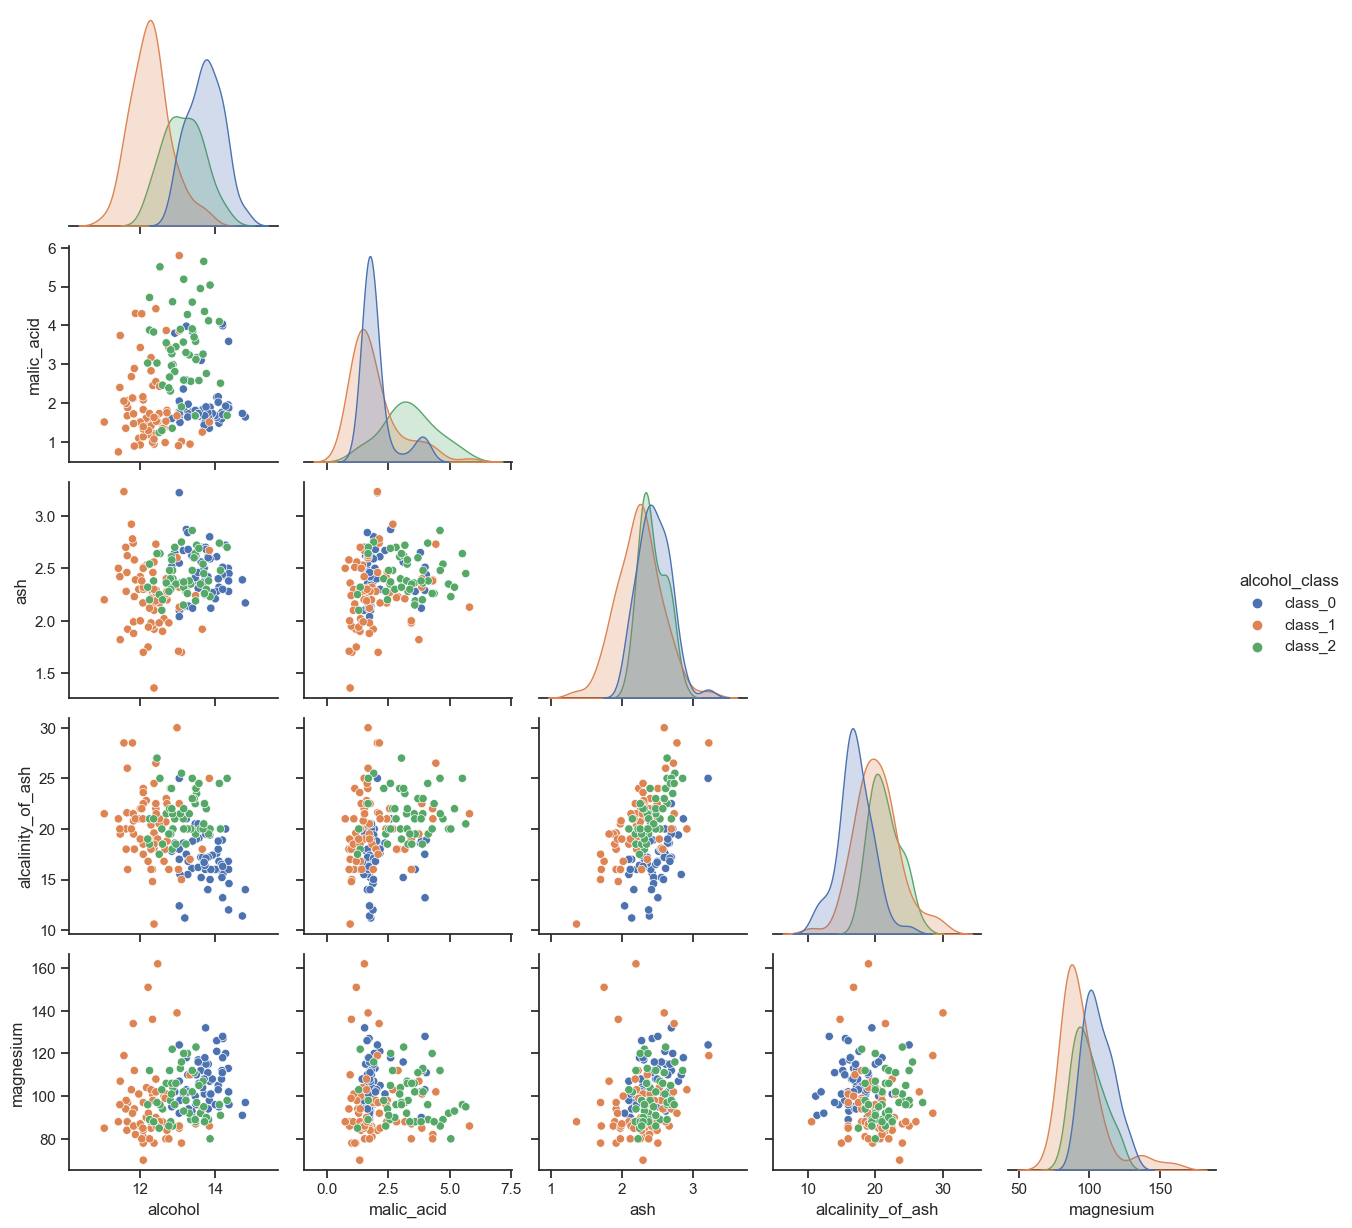

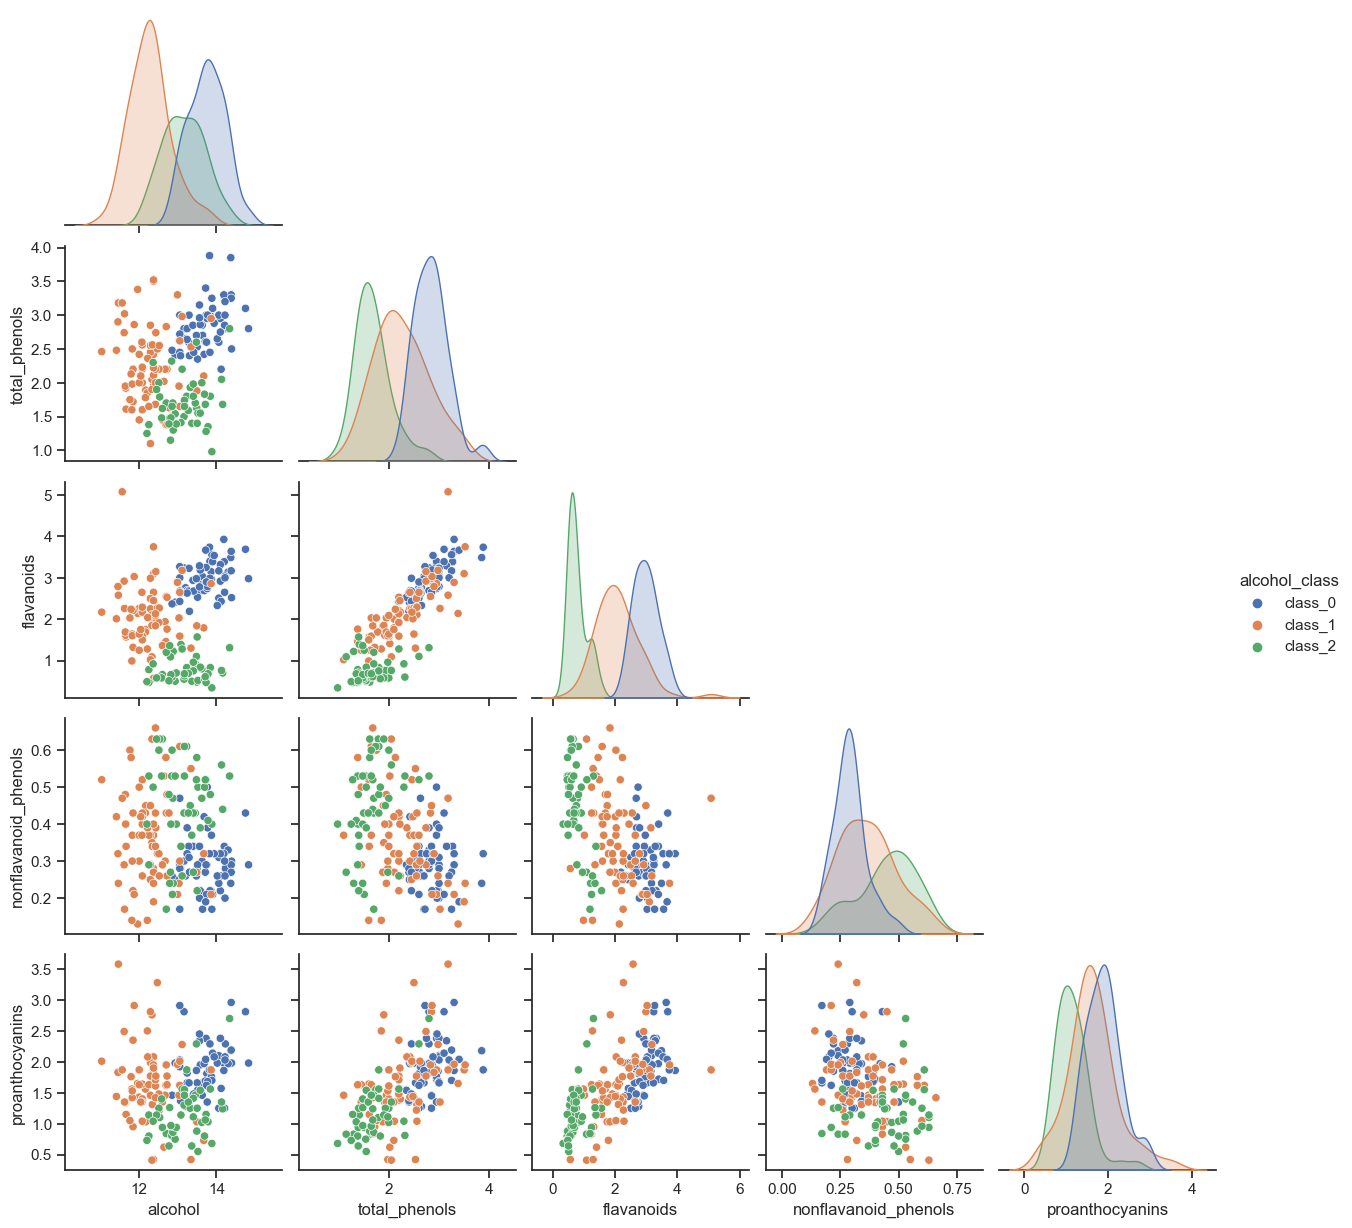

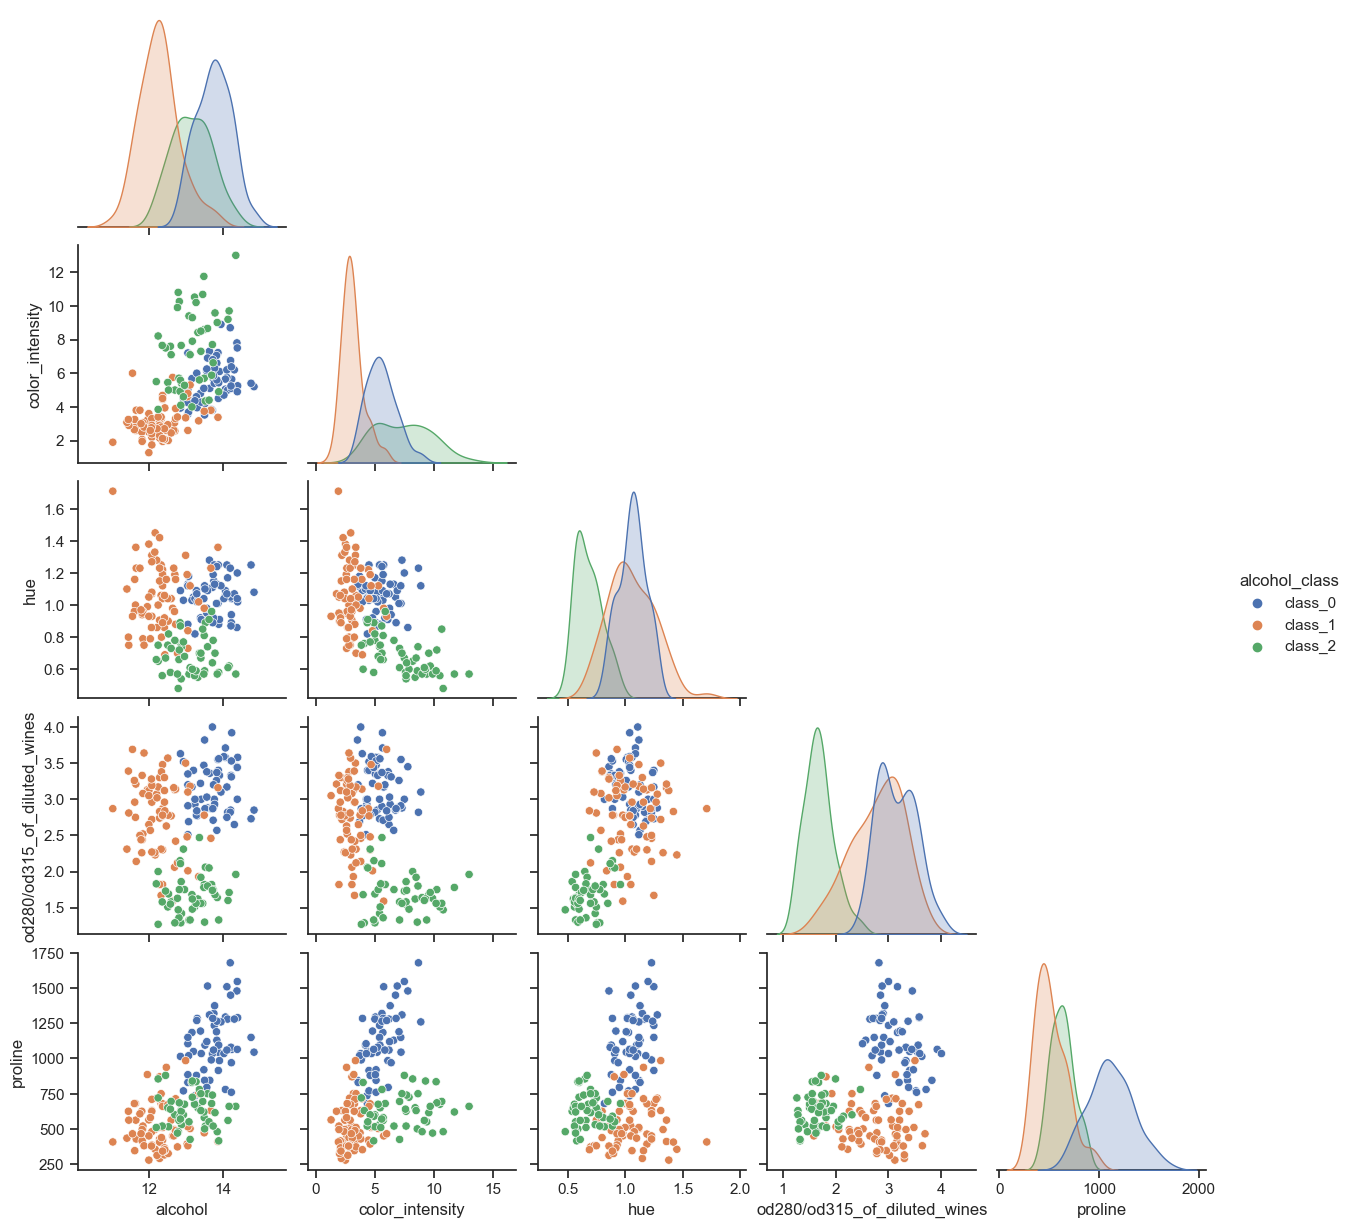

In [20]:
examine_all_features('alcohol')

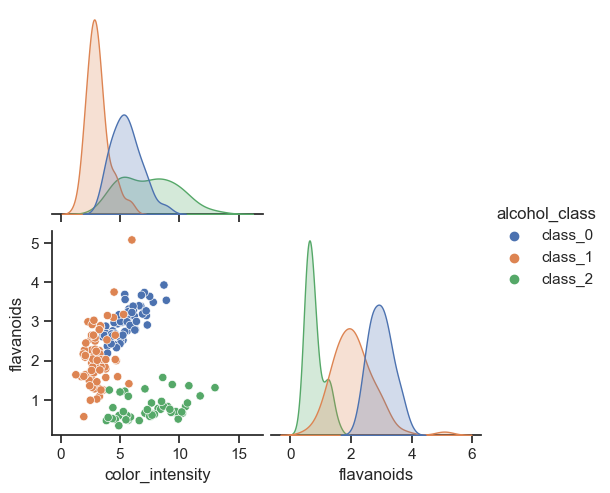

In [21]:
examine_feature_pair('color_intensity', 'flavanoids')

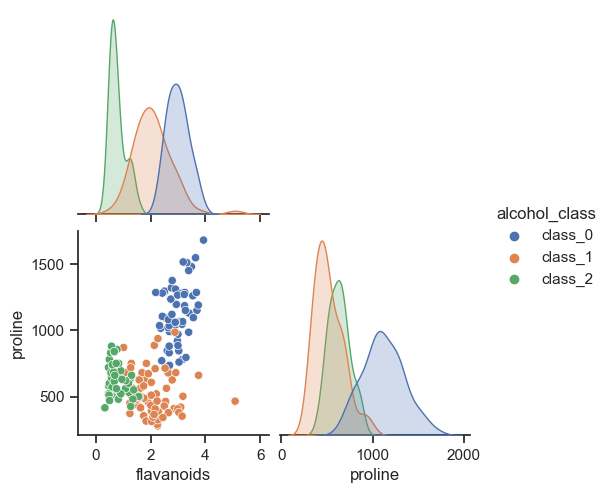

In [22]:
examine_feature_pair('flavanoids', 'proline')

# 4. [20 pts] Outline and answer the following questions:

**i. Which features would you use?**

- I would use petal width+length and sepal length

**ii. Are three clusters obvious from the plots?**

- Yes, although virginia and versicolor overlap a bit sometimes

**iii. What about four clusters? Roughly mark them manually (i.e. specify their ranges) on a few plots if possible or specify their ranges.**

Here's a way you could maybe cluster them into 4 clusters: setosa, virginia, virginia/versicolor, versicolor

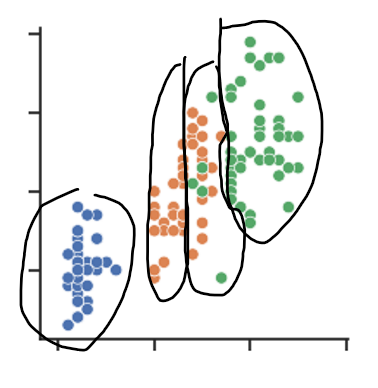

We would classify them based on the label probabilities. If the classifier thinks it's like a 50% virginia and 50% versicolor, then it we would put them in the virginia/versicolor group.

If the classifier thinks its like a 95% chance it's virginia, we would put it into the virginia group.

**iv. For this problem, is there any relation between classification and clustering since the labels are already given?**

Clustering is unsupervised learning. You would use clustering to assign labels to clusters of datapoints. Here, since they are already labelled, we've already manually clustered everything. 

However, if we want to create new clusters, we can use the probabilities from the classification algorithm to create new clusters like I did in iii.

# 5. [20 pts] Using the scikit-learn class descriptions for Naive Bayes and decision trees, classify the Iris dataset.

Your code should be very similar to that in the Module
1 Jupyter notebook. In classification with SVM section, the dataset is divided into two
portions, one for training and the other for testing. Make sure you use the same input data
for the Naive Bayes classifier, and the decision tree classifier.

Answer the following questions:

i. Which classifier has the highest performance?

ii. Does more training help? Test this by increasing the training dataset size from let's
say 1% training (with the remaining 99% testing), and then 5% training, 10%
training, etc.

iii. Will the performance plateau? Show it on a plot.

## i. Which classifier has highest performance?

In [23]:
shuffled_iris = iris_df.sample(frac=1, random_state=0)
X = shuffled_iris.drop(columns='species')
y = shuffled_iris.species

In [24]:
X_train = X[:len(X)//2]
y_train = y[:len(y)//2] 

In [25]:
print(X_train.head())
print(y_train.head())
print(len(X_train))
print(len(y_train))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object
75
75


In [26]:
X_test = X[len(X)//2:]
y_test = y[len(y)//2:]

In [27]:
# Is Iris data balanced?

iris_df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.9733333333333334

In [29]:
confusion_matrix(y_test, y_pred_nb)

array([[29,  0,  0],
       [ 0, 18,  2],
       [ 0,  0, 26]], dtype=int64)

## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0)

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.96

In [31]:
confusion_matrix(y_test, y_pred_tree)

array([[29,  0,  0],
       [ 0, 18,  2],
       [ 0,  1, 25]], dtype=int64)

## Answer:

Naive Bayes classifier had the better accuracy. 

## ii. Does more training help? Test this by increasing the training dataset size 

from let's
say 1% training (with the remaining 99% testing), and then 5% training, 10%
training, etc.

In [32]:
def accuracy_both(X, y, times, size):
    nb_accuracy_list = []
    tree_accuracy_list = []

    for i in range(times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, shuffle=True)

        nb_model = GaussianNB()
        tree_model = DecisionTreeClassifier(random_state=0)

        nb_model.fit(X_train, y_train)
        y_pred_nb = nb_model.predict(X_test)

        nb_accuracy_list.append(accuracy_score(y_test, y_pred_nb))

        tree_model.fit(X_train, y_train)
        y_pred_tree = tree_model.predict(X_test)

        tree_accuracy_list.append(accuracy_score(y_test, y_pred_tree))

    return np.mean(nb_accuracy_list), np.std(nb_accuracy_list), np.mean(tree_accuracy_list), np.std(tree_accuracy_list)

Training size of 1%

In [33]:
from sklearn.model_selection import train_test_split

nb_accuracy, nb_std, tree_accuracy, tree_std = accuracy_both(X, y, 10, size=.95)

print(f"Naive Bayes accuracy: {nb_accuracy} std: {nb_std}\n"
      f"Decision Tree accuracy: {tree_accuracy} std: {tree_std}")

Naive Bayes accuracy: 0.5349650349650349 std: 0.12804079317203185
Decision Tree accuracy: 0.7468531468531469 std: 0.1711730419173278


Test on multiple

In [34]:
for size in range(95, 75, -5):
    nb_accuracy, nb_std, tree_accuracy, tree_std = accuracy_both(X, y, 100, size/100)

    print(f"Training Size: {100-size}%\n"
          f"Naive Bayes accuracy: {round(nb_accuracy,3)} std: {round(nb_std,2)}\n"
          f"Decision Tree accuracy: {round(tree_accuracy,3)} std: {round(tree_std, 2)}\n")

Training Size: 5%
Naive Bayes accuracy: 0.56 std: 0.15
Decision Tree accuracy: 0.737 std: 0.14

Training Size: 10%
Naive Bayes accuracy: 0.839 std: 0.12
Decision Tree accuracy: 0.887 std: 0.09

Training Size: 15%
Naive Bayes accuracy: 0.924 std: 0.06
Decision Tree accuracy: 0.921 std: 0.06

Training Size: 20%
Naive Bayes accuracy: 0.938 std: 0.03
Decision Tree accuracy: 0.93 std: 0.04



### Answer

Yes, for the most part, increasing training size helps the performance!

## iii. Will the performance plateau? Show it on a plot.

In [35]:
nb_accuracy_list = []
tree_accuracy_list = []

for size in range(95, 5, -1):
    nb_accuracy, _, tree_accuracy, _ = accuracy_both(X, y, 50, size/100)

    nb_accuracy_list.append(nb_accuracy)
    tree_accuracy_list.append(tree_accuracy)

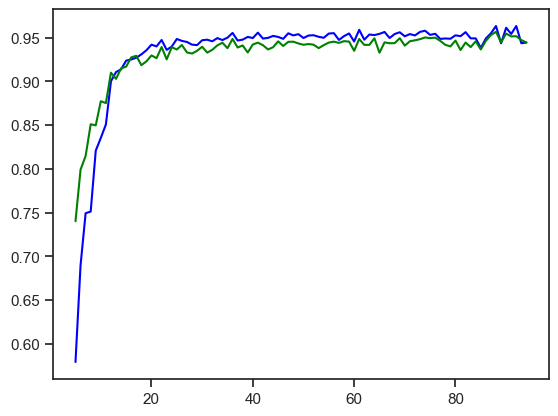

In [36]:
plt.plot(range(5, 95, 1), nb_accuracy_list, color='blue')
plt.plot(range(5, 95, 1), tree_accuracy_list, color='green')

## Answer

Yes, the performance starts to plateau at about 20% training for this dataset. 